In [89]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, Matern, ConstantKernel, DotProduct
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 200

def calc_cs1_polynomial(true_model_coefficients, x):
    """
    Calculates the value of y for case study 1
    
    Parameters
    ----------
    true_model_coefficients: ndarray, The array containing the true values of Theta1 and Theta2
    x: ndarray, The list of xs that will be used to generate y
    
    Returns
    --------
    y_poly: ndarray, The noiseless values of y given theta_true and x
    """
    
    y_poly =  true_model_coefficients[0]*x + true_model_coefficients[1]*x**2 +x**3
       
    return y_poly

seed = 1
noise_mean = 0
noise_std = 0.1
theta_ref = np.array([1,-1])

In [90]:
np.random.seed(seed)

# Create synthetic data assuming the following values for theta
X_test = np.linspace(-2,2,1000).reshape(-1,1)
Y_test = (1*X_test -1*X_test**2 + X_test**3).reshape(-1,1)
X_train = np.linspace(-2,2,5).reshape(-1,1)
Y = (1*X_train -1*X_train**2 + X_train**3).reshape(-1,1)
noise = np.random.normal(size=Y.shape, loc = noise_mean, scale = noise_std)
Y_train = Y + noise

kernel = 1*Matern(nu = 5/2) + WhiteKernel()
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100, random_state = seed)

fit_gp_model = gp_model.fit(X_train, Y_train)
Y_gp, stdev_gp = fit_gp_model.predict(X_test, return_std=True)
print(fit_gp_model.kernel_)

9.74**2 * Matern(length_scale=1.77, nu=2.5) + WhiteKernel(noise_level=1e-05)


/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


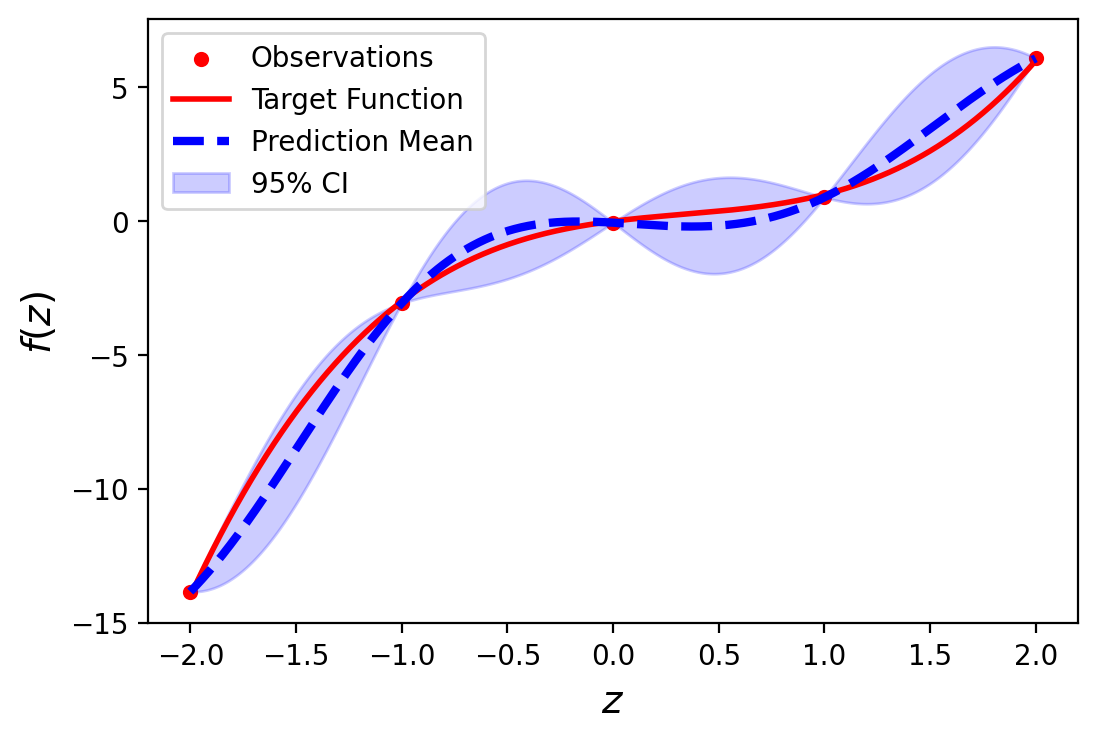

In [91]:
# Compare the experiments to the true model
plt.scatter(X_train,Y_train, color = "r", s=20,label="Observations")
plt.plot(X_test,Y_test,'r-',linewidth=2,label="Target Function")
plt.plot(X_test,Y_gp,'b',linestyle = "--", linewidth = 3, label="Prediction Mean")
plt.fill_between(X_test.flatten(), Y_gp-1.96*stdev_gp, Y_gp+1.96*stdev_gp, alpha=0.2, color = "b", label = "95% CI")
plt.xlabel(r"$z$",fontsize=14)
plt.ylabel(r'$f(z)$',fontsize=14)
plt.legend()
plt.show()

In [92]:
np.random.seed(seed)

Xexp = np.linspace(-2,2,5)
Yexp = calc_cs1_polynomial(theta_ref, Xexp)
#Creates noise values with a certain stdev and mean from a normal distribution
noise = np.random.normal(size=len(Yexp), loc = noise_mean, scale = noise_std)
#Add noise to data
Yexp = Yexp + noise

# Evaluate model based on the assumed experimental values
X = np.linspace(np.min(Xexp),np.max(Xexp),100)
Y = calc_cs1_polynomial(theta_ref, X)

#Set GP Model
noise_kern = WhiteKernel(noise_level = noise_std**2, noise_level_bounds= (1e-5, 1e2)) #bounds = "fixed"
c_kern = ConstantKernel(constant_value= np.ones(1), constant_value_bounds = (1e-14, 1e14))
Mat_kern = Matern(length_scale = 1, length_scale_bounds=(1e-14, 1e4), nu=2.5)
kernel = c_kern*Mat_kern + noise_kern

gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state = seed,
                                   optimizer = "fmin_l_bfgs_b")

fit_gp_model = gp_model.fit(Xexp.reshape(-1,1), Yexp)
Y_gp, stdev_gp = fit_gp_model.predict(X.reshape(-1,1), return_std=True)
print(fit_gp_model.kernel_)

9.74**2 * Matern(length_scale=1.77, nu=2.5) + WhiteKernel(noise_level=3.93e-05)


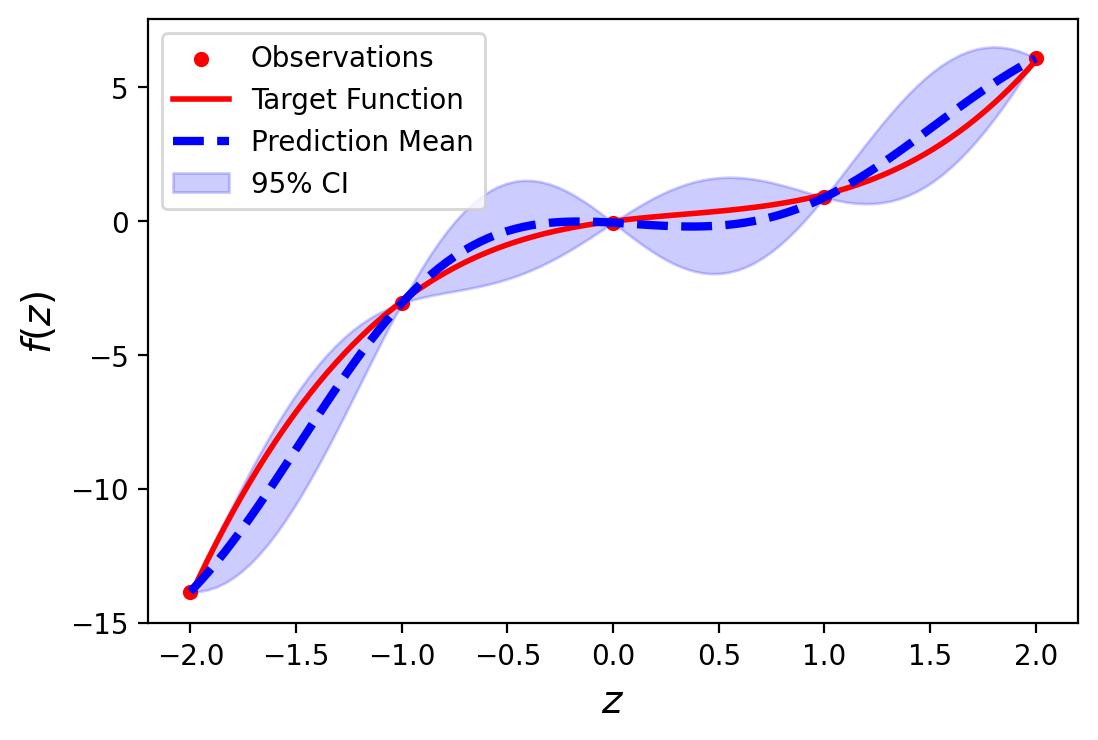

In [93]:
# Compare the experiments to the true model
# plt.plot(X,Y,'b-',linewidth=2,label=r"$y$")
plt.scatter(Xexp,Yexp, color = "r", s=20,label="Observations")#r"$y_{exp}$")
plt.plot(X,Y,'r-',linewidth=2,label="Target Function")#r"$y_{true}$")
plt.plot(X,Y_gp,'b',linestyle = "--", linewidth = 3, label="Prediction Mean")#r"$y_{gp}$")
plt.fill_between(X.flatten(), Y_gp-1.96*stdev_gp, Y_gp+1.96*stdev_gp, alpha=0.2, color = "b", label = "95% CI")
# plt.title(r"all trained")
plt.xlabel(r"$z$",fontsize=14)
plt.ylabel(r'$f(z)$',fontsize=14)
plt.legend()
plt.show()